In [52]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load Data
purchase_df = pd.read_csv('purchase_behaviour.csv')
transactions_df = pd.read_csv('transaction_data.csv')

In [54]:
# Calculate total sales per product
product_sales = transactions_df.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

In [55]:
# Sort products by total sales 
top_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(5)
print("\nTop 3 Most Profitable Products:")
display(top_products)


Top 3 Most Profitable Products:


,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
101,102,Kettle Mozzarella Basil & Pesto 175g,34457.4
6,7,Smiths Crinkle Original 330g,34302.6


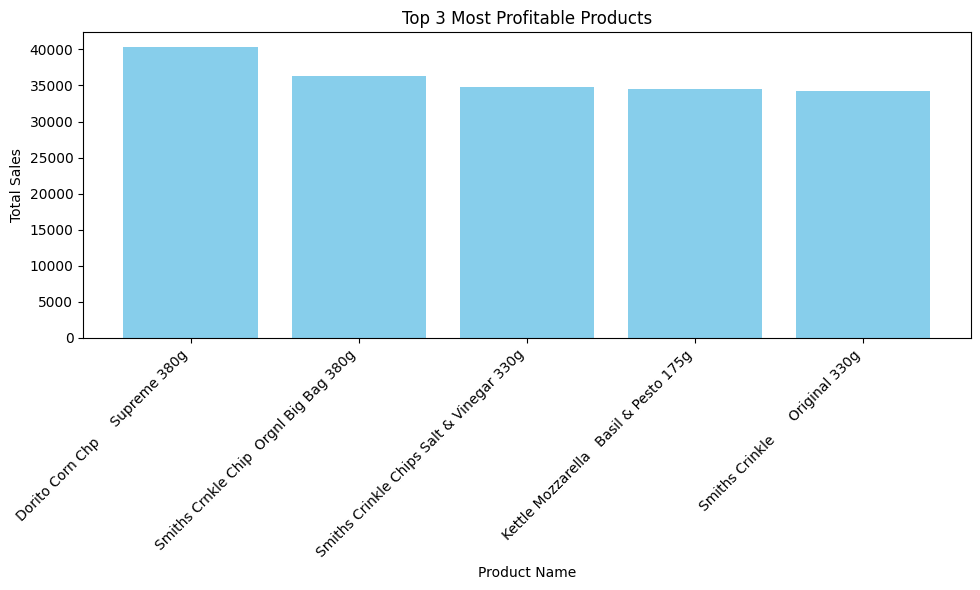

In [56]:
# Visualize the sales for these products
plt.figure(figsize=(10, 6))
plt.bar(top_products['PROD_NAME'], top_products['TOT_SALES'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 3 Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
# Calculate the total spending per customer
total_spending_per_customer = transactions_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
avg_spending = total_spending_per_customer['TOT_SALES'].mean()

In [58]:
print(f"\nAverage spending per customer: ${avg_spending:.2f}")


Average spending per customer: $26.63


In [59]:
# number of unique transactions per loyalty card
txn_counts = transactions_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().reset_index()
txn_counts.columns = ['LYLTY_CARD_NBR', 'txn_count']

In [60]:
# average number of transactions across all customers
avg_txn = txn_counts['txn_count'].mean()
print(f"\nAverage transactions per customer: {avg_txn:.2f}")


Average transactions per customer: 3.62


In [61]:
# loyal customers: with transaction count above the average
loyal_customers = txn_counts[txn_counts['txn_count'] > avg_txn]
print("Loyal Customers (above average transaction count):")
display(loyal_customers.head())

Loyal Customers (above average transaction count):


,LYLTY_CARD_NBR,txn_count
8,1011,4
26,1042,4
52,1081,4
68,1104,4
96,1146,4


In [62]:
# Merge with the purchase behaviour data to see their characteristics
loyal_customers_profile = pd.merge(loyal_customers, purchase_df, on='LYLTY_CARD_NBR', how='left')
print("Loyal Customers Profile:")
display(loyal_customers_profile.head())

Loyal Customers Profile:


,LYLTY_CARD_NBR,txn_count,LIFESTAGE,PREMIUM_CUSTOMER
0,1011,4,OLDER SINGLES/COUPLES,Mainstream
1,1042,4,YOUNG SINGLES/COUPLES,Premium
2,1081,4,MIDAGE SINGLES/COUPLES,Budget
3,1104,4,RETIREES,Mainstream
4,1146,4,YOUNG SINGLES/COUPLES,Premium


In [63]:
# Merge the total spending data for loyal customers
loyal_customers_spending = pd.merge(loyal_customers, total_spending_per_customer, on='LYLTY_CARD_NBR', how='left')

In [64]:
# Categorize spending
loyal_customers_spending.loc[:, 'spending_category'] = pd.cut(
    loyal_customers_spending['TOT_SALES'], 
    bins=[0, avg_spending, avg_spending * 1.5, avg_spending * 2, loyal_customers_spending['TOT_SALES'].max()], 
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [65]:
# Group by spending category and display counts
spending_category_counts = loyal_customers_spending.groupby('spending_category', observed=True).size()
print("\nSpending Categories among Loyal Customers:")
display(spending_category_counts)


Spending Categories among Loyal Customers:


spending_category
Low           2145
Medium       10434
High          9652
Very High     8547
dtype: int64

In [66]:
#Dist of LIFESTAGE among loyal customers
lifestage_distribution = loyal_customers_profile['LIFESTAGE'].value_counts()
print("\nDistribution of LIFESTAGE among Loyal Customers:")
display(lifestage_distribution)


Distribution of LIFESTAGE among Loyal Customers:


LIFESTAGE
OLDER SINGLES/COUPLES     7423
RETIREES                  6552
OLDER FAMILIES            5433
YOUNG FAMILIES            4909
MIDAGE SINGLES/COUPLES    3003
YOUNG SINGLES/COUPLES     2711
NEW FAMILIES               747
Name: count, dtype: int64

In [67]:
#Distribution of PREMIUM_CUSTOMER among loyal customers
premium_distribution = loyal_customers_profile['PREMIUM_CUSTOMER'].value_counts()
print("\nDistribution of PREMIUM_CUSTOMER among Loyal Customers:")
display(premium_distribution)


Distribution of PREMIUM_CUSTOMER among Loyal Customers:


PREMIUM_CUSTOMER
Mainstream    11626
Budget        10857
Premium        8295
Name: count, dtype: int64

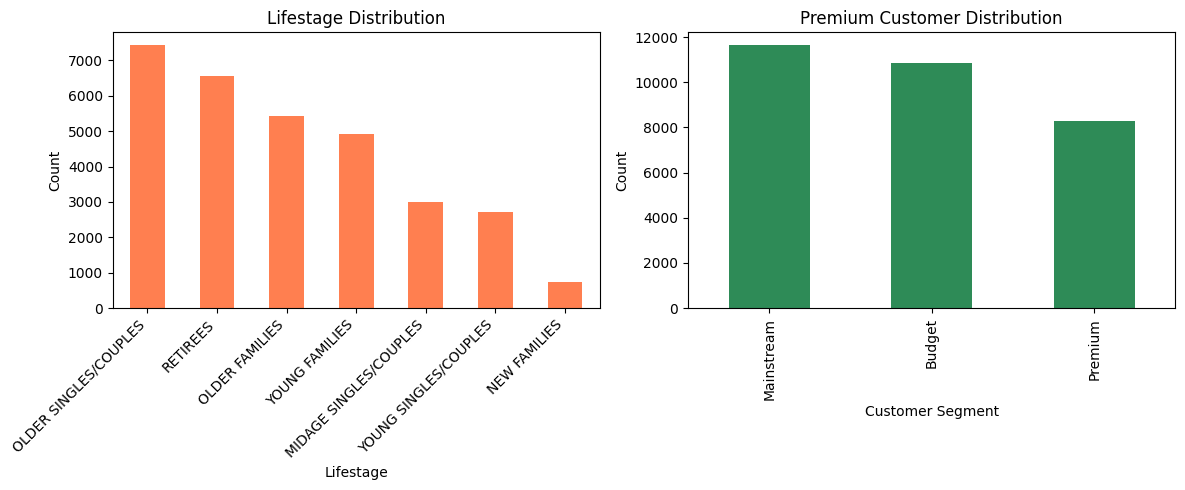

In [68]:
# Visualize the distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
lifestage_distribution.plot(kind='bar', color='coral')
plt.title('Lifestage Distribution')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
premium_distribution.plot(kind='bar', color='seagreen')
plt.title('Premium Customer Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [69]:
# Create a comprehensive customer profile
customer_profile = pd.merge(total_spending_per_customer, purchase_df, on='LYLTY_CARD_NBR', how='left')

In [70]:
# Advanced segmentation
customer_profile['spending_tier'] = pd.cut(
    customer_profile['TOT_SALES'], 
    bins=[0, avg_spending/2, avg_spending, avg_spending*2, float('inf')], 
    labels=['Low Spender', 'Below Average', 'Average', 'High Spender']
)

In [71]:
# Detailed segmentation analysis
segmentation_analysis = customer_profile.groupby(['spending_tier', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
print("\nDetailed Customer Segmentation:")
display(segmentation_analysis)


Detailed Customer Segmentation:


C:\Users\huzai\AppData\Local\Temp\ipykernel_20584\3013936857.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_analysis = customer_profile.groupby(['spending_tier', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')


,spending_tier,LIFESTAGE,PREMIUM_CUSTOMER,count
0,Low Spender,MIDAGE SINGLES/COUPLES,Budget,586
1,Low Spender,MIDAGE SINGLES/COUPLES,Mainstream,1044
2,Low Spender,MIDAGE SINGLES/COUPLES,Premium,951
3,Low Spender,NEW FAMILIES,Budget,478
4,Low Spender,NEW FAMILIES,Mainstream,360
...,...,...,...,...
79,High Spender,YOUNG FAMILIES,Mainstream,670
80,High Spender,YOUNG FAMILIES,Premium,645
81,High Spender,YOUNG SINGLES/COUPLES,Budget,125
82,High Spender,YOUNG SINGLES/COUPLES,Mainstream,375


In [72]:
print("Hypothesis on Loyal Customers Behavior:")
print("Loyal customers tend to have more disposable income or more consistent spending patterns. "
      "\nOlder customers, such as retirees and older families, are more likely to be loyal due to their preference "
      "\nfor quality products and established brand relationships. Premium customers appreciate high-quality products, "
      "\nwhich results in repeat purchases. The trend of loyal customers being concentrated in the 'Mainstream' "
      "\ncategory suggests that people tend to stick with brands they trust.")

Hypothesis on Loyal Customers Behavior:
Loyal customers tend to have more disposable income or more consistent spending patterns. 
Older customers, such as retirees and older families, are more likely to be loyal due to their preference 
for quality products and established brand relationships. Premium customers appreciate high-quality products, 
which results in repeat purchases. The trend of loyal customers being concentrated in the 'Mainstream' 
category suggests that people tend to stick with brands they trust.
